In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 

In [4]:
b = datasets.load_breast_cancer()
X = b.data  
y = b.target
print(X.shape)

(569, 30)


In [5]:
x_neg_0=np.zeros(200)
x_pos_0=np.ones(369)

In [6]:
#first two classes positive, rest negative
x_neg=b.data[369:569]
x_pos=b.data[0:369]

In [7]:
x_negt = np.insert(x_neg, 4, x_neg_0, axis=1)
x_post = np.insert(x_pos, 4, x_pos_0, axis=1)

In [8]:
x_train = np.concatenate((x_post, x_negt)).reshape(-1, 31)
y_train = np.concatenate((np.ones(369),np.zeros(200))).reshape(-1, 1).astype(int)
print(x_train.shape)

(569, 31)


In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [10]:
print(x_train)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [11]:
x_n=np.concatenate((np.ones(100),np.zeros(100)))
x_test=x_neg
np.random.shuffle(x_test)
x_test=np.insert(x_test, 30, x_n, axis=1).reshape(-1,31)
y_test=np.zeros(200).reshape(-1,1)
x_test=scaler.transform(x_test)

In [12]:
x_train.shape

(569, 31)

In [13]:
y_train.shape

(569, 1)

# Model training

In [14]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 7000
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [15]:
model = Sequential()
model.add(Dense(layer_size,input_dim=31,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = len(x_train)

In [19]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

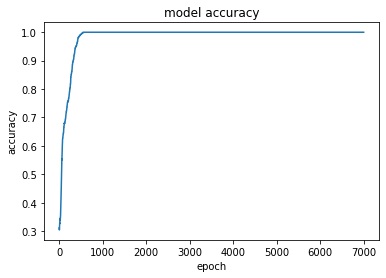

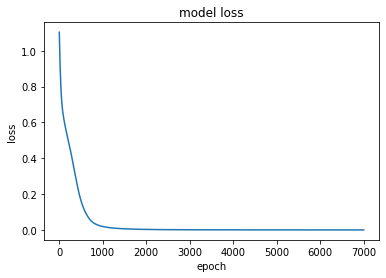

In [20]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

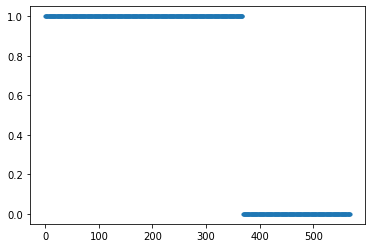

In [21]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [29]:
layer_size = 3
number_of_epochs = 2000
model = Sequential()

In [30]:
model.add(Dense(layer_size,input_dim=31,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


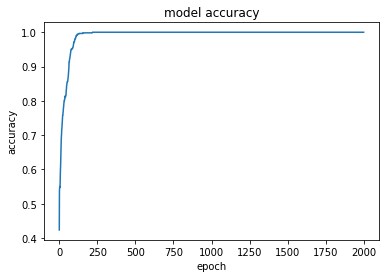

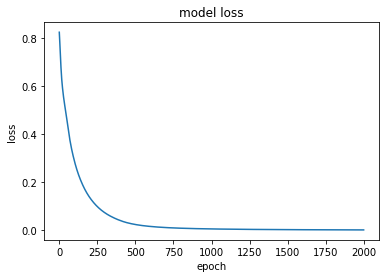

In [31]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=3
#epochs 2000

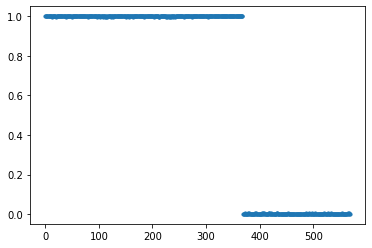

In [32]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [40]:
layer_size = 1
number_of_epochs = 4000
model = Sequential()
model.add(Dense(layer_size,input_dim=31,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


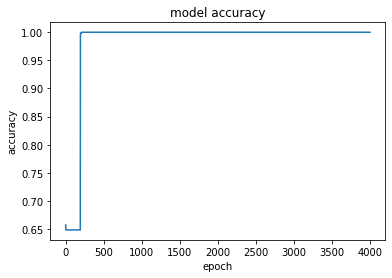

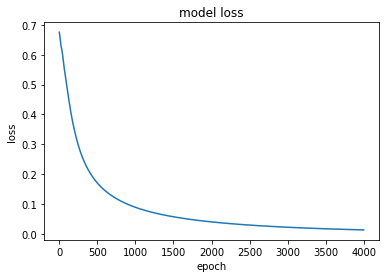

In [41]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1

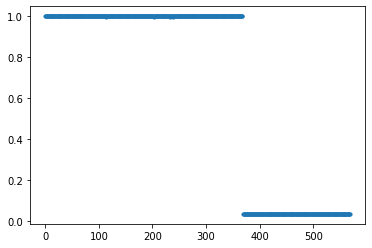

In [42]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

# Bloom Filter

In [43]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict(x_train)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict(x)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [44]:
m=30

In [45]:
bf=BloomFilter(m,model)

In [46]:
bf.add_init(x_train,y_train)

In [47]:
pred = bf.predict(x_train)
tn, fp, fn, tp = confusion_matrix(y_train, pred,labels=[False,True]).ravel() # ravel opens up the 2x2 matrix
print(tn)
print(tp)
print(fp)
print(fn)

200
369
0
0


In [48]:
print(fpr_kraska_hash(bf,x_train,y_train))

0.0


In [49]:
print(fpr_kraska_hash(bf,x_test,y_test))

0.0
